In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as sco

In [83]:
# Creating a list of Stock Tickers
stocks = ['RELIANCE.NS','ADANIENT.NS','MARUTI.NS','MARUTI.NS','TCS.NS','^NSEI']
pf_data = pd.DataFrame()
# Pulling closing price   
for stock in stocks:
    pf_data[stock] = wb.DataReader(stock, data_source = 'yahoo', start = '2011-1-1')['Adj Close']
    
num_stocks = len(stocks)

In [84]:
# Viewing data
pf_data

,RELIANCE.NS,ADANIENT.NS,MARUTI.NS,TCS.NS,^NSEI
Date,,,,,
2011-01-03,477.112671,83.195168,1291.344971,464.636230,6157.600098
2011-01-04,486.830322,83.400345,1293.790161,459.299805,6146.350098
2011-01-05,486.242767,83.618362,1279.029541,464.997101,6079.799805
2011-01-06,490.672150,82.637329,1244.121338,470.112793,6048.250000
2011-01-07,481.542145,80.547020,1213.921509,458.457275,5904.600098
...,...,...,...,...,...
2022-11-02,2545.649902,3580.699951,9229.400391,3241.699951,18082.849609
2022-11-03,2555.149902,3590.399902,9239.099609,3206.750000,18052.699219
2022-11-04,2592.750000,3833.250000,9229.500000,3217.399902,18117.150391


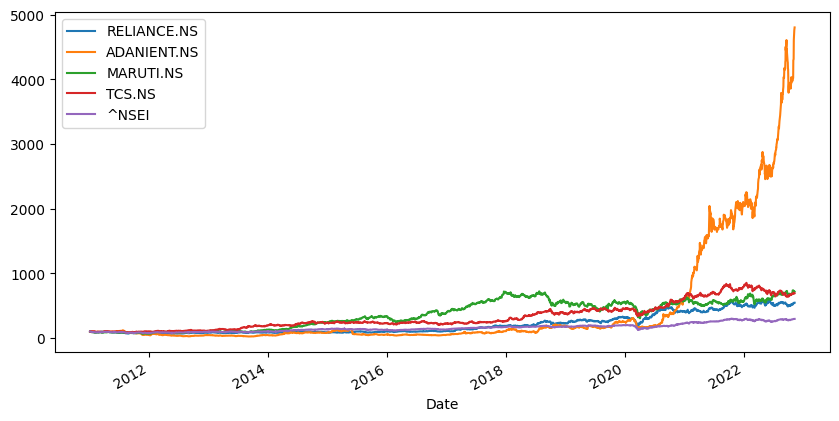

In [85]:
# Plotting Normalized returns
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5))
plt.show()

In [86]:
# Daily percentage change
pf_data_returns = pf_data.pct_change(1)
pf_data_returns = pf_data_returns[1:]

In [87]:
beta = {}
alpha = {}

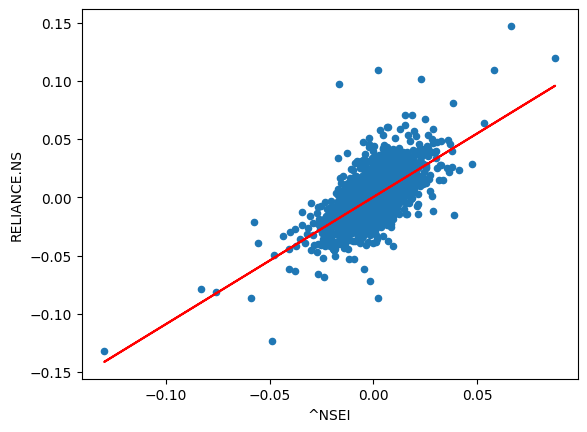

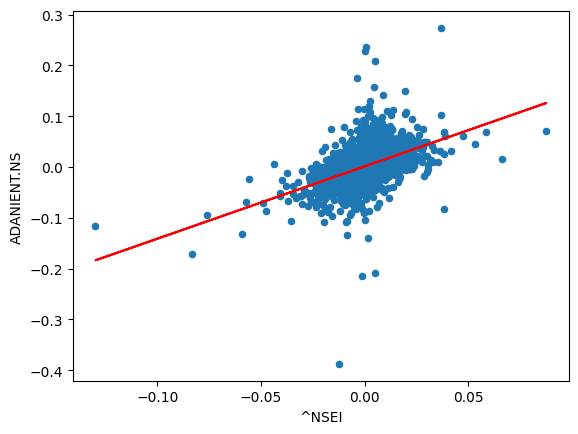

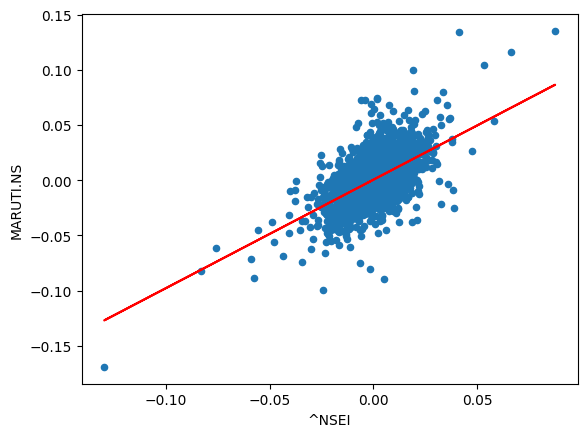

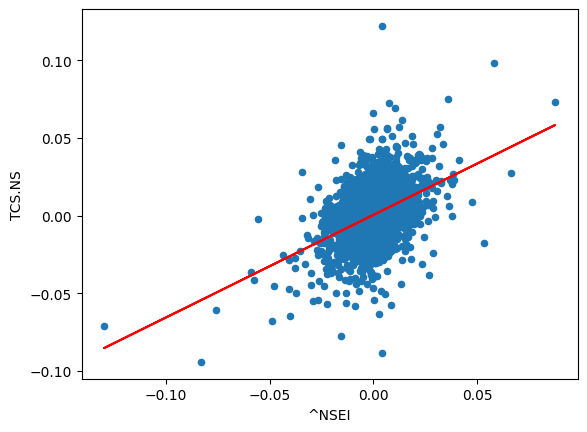

In [88]:
for i in pf_data_returns.columns:
    if i != '^NSEI':
        pf_data_returns.plot(kind = 'scatter', x = '^NSEI', y = i)
        b,a = np.polyfit(pf_data_returns['^NSEI'], pf_data_returns[i],    1)
        plt.plot(pf_data_returns['^NSEI'], b * pf_data_returns['^NSEI'] + a, '-', color = 'r')  
        beta[i] = b    
        alpha[i] = a
        plt.show()

In [89]:
keys = list(beta.keys())

In [90]:
ER = {}
rf = 0 
rm = pf_data_returns['^NSEI'].mean() * 252

In [91]:
for i in keys:
    ER[i] = rf + (beta[i] * (rm-rf))
    print('Expected Return based on CAPM for {} is {}%'.format(i,round(ER[i]*100,2)))

Expected Return based on CAPM for RELIANCE.NS is 11.85%
Expected Return based on CAPM for ADANIENT.NS is 15.47%
Expected Return based on CAPM for MARUTI.NS is 10.67%
Expected Return based on CAPM for TCS.NS is 7.17%


In [92]:
portfolio_weights = 1/4 * np.ones(4) 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
print('Expected Return based on CAPM for the portfolio is {}%\n'.format(round(ER_portfolio*100,2)))

Expected Return based on CAPM for the portfolio is 11.29%

